In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os

In [3]:
sys.path.append('/content/drive/MyDrive/Data/')
main_path = '/content/drive/MyDrive/Data'

In [4]:
from IPython.display import Audio
import IPython

In [25]:
#using ESC-10 data

(128, 216)


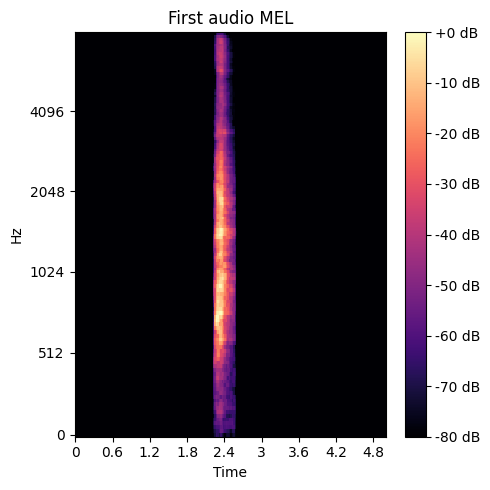

In [5]:
y1_, sr1_ = librosa.load('/content/drive/MyDrive/Data/dog/1-100032-A-0.wav')
#print(len(y1_))
plt.figure(figsize=(5, 5))
#mel=librosa.feature.mfcc(y=y1_,sr=sr1_, n_mfcc =20, hop_length=400, n_fft =1600)
#print(mel.shape)
mel = librosa.feature.melspectrogram(y=y1_, sr=sr1_)
print(mel.shape)
mel = librosa.power_to_db(mel,ref=np.max)
librosa.display.specshow(mel,y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("First audio MEL")
plt.tight_layout()
plt.savefig('/content/sample_data/mel_spectogram.png')  #128 features  216 timestamp

In [14]:
subdirs = os.listdir(main_path)
print(subdirs)

# 216 Features per frame, <-|--|--|--|--|--------------------------------> 128 X 216

['006-helicopter', '008-rooster', '001-chainsaw', '004-crying_baby', '007-rain', '002-clock_tick', '009-sea_waves', '005-dog', '010-sneezing', '003-crackling_fire']


In [16]:


features =[]
labels= []
for s in subdirs:
  
  try:
    cl_tag = int(str(s).split('-')[0])
    print(cl_tag)
    
    files = os.listdir(main_path+'/' + str(s))

    for f in files:
      y1_, sr1_ = librosa.load(main_path +'/'+ str(s)+'/'+str(f))
      mfccs = librosa.feature.mfcc(y=y1_, sr=sr1_, n_mfcc=40)
      #mel = librosa.feature.melspectrogram(y=y1_, sr=sr1_)
      #print(mel.shape)
      mel = librosa.power_to_db(mel,ref=np.max)
      if mfccs.shape[1] == 216:
        mfccs_scaled = np.reshape(mfccs,(mfccs.shape[0]*mfccs.shape[1]))

        features.append(mfccs_scaled.tolist())
        labels.append(int(cl_tag)-1)

  except Exception as e:
    print(e)

features = np.array(features)
labels = np.array(labels)
print(features.shape)
print(labels.shape)


6
8
1
4
7
2
9
5
10
3
(400, 8640)
(400,)


In [17]:
print(features[0])

[-236.60140991 -201.90988159 -206.25672913 ...    8.50577545    9.00118256
    7.49343634]


In [18]:
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.layers import Dense, Activation,Input, Dropout
from tensorflow.keras.models import Sequential
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
def my_sequential_model(inp_dim, noc = 10):
  model = Sequential()
  model.add(Dense(input_shape = inp_dim, units= 256, name='dense-1'))
  model.add(Dropout(0.2))
  model.add(Activation('relu'))
  model.add(Dense(units=256))
  model.add(Dropout(0.2))
  model.add(Activation('relu'))
  model.add(Dense(units=noc, activation='softmax'))
  return model

In [20]:
x,x_test,y,y_test = train_test_split(features,labels,test_size = 0.2)
#print(x_test)
# one-hot representation
y = tf.keras.utils.to_categorical(y)
y_test = tf.keras.utils.to_categorical(y_test)
print(y.shape)


(320, 10)


In [21]:
my_model = my_sequential_model(x[0].shape)
base_learning_rate = 0.0001
my_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                      loss=tf.keras.losses.categorical_crossentropy,
                      metrics=['accuracy'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense-1 (Dense)             (None, 256)               2212096   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2

In [22]:

history = my_model.fit(x, y, batch_size = 32, validation_data=(x_test,y_test), verbose=True, epochs=20)


Epoch 1/20
10/10 [==============================] - 6s 28ms/step - loss: 74.5475 - accuracy: 0.2375 - val_loss: 41.8884 - val_accuracy: 0.3000
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 32.9273 - accuracy: 0.4313 - val_loss: 22.0529 - val_accuracy: 0.4875
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 16.0498 - accuracy: 0.6156 - val_loss: 17.7121 - val_accuracy: 0.4500
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 11.7887 - accuracy: 0.6438 - val_loss: 15.9181 - val_accuracy: 0.5750
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 6.7998 - accuracy: 0.6969 - val_loss: 13.6092 - val_accuracy: 0.5000
Epoch 6/20
10/10 [==============================] - 0s 7ms/step - loss: 4.3512 - accuracy: 0.7375 - val_loss: 13.0230 - val_accuracy: 0.5250
Epoch 7/20
10/10 [==============================] - 0s 9ms/step - loss: 4.1755 - accuracy: 0.7406 - val_loss: 10.4448 - val_accuracy: 0.5000
Epoch 8/

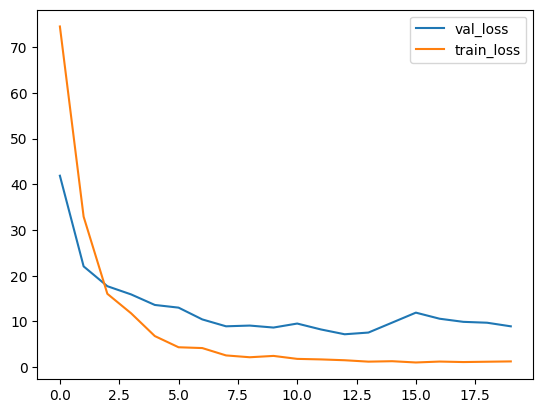

In [23]:
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['loss'], label = 'train_loss')
plt.legend()
plt.show()
# 59.74
# 67.53

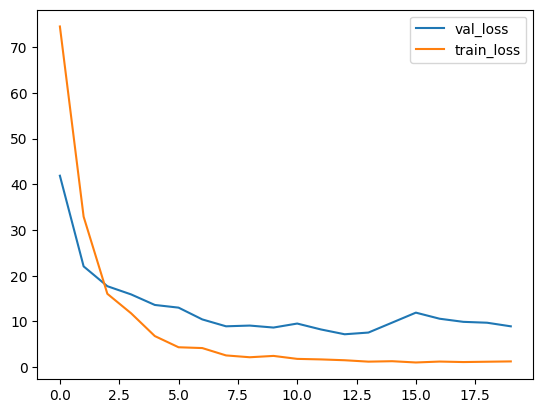

In [24]:
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['loss'], label = 'train_loss')
plt.legend()
plt.show()
# 59.74
# 67.53